In [3]:
from langgraph.graph import START, END, StateGraph
from langchain_groq import ChatGroq
from typing import TypedDict
from IPython.display import Image
from dotenv import load_dotenv

_ = load_dotenv()

In [7]:
llm = ChatGroq(model="openai/gpt-oss-20b")

In [8]:
response = llm.invoke("Hello")
response.content

'Hello! How can I assist you today?'

In [9]:
class LLMState(TypedDict):
    input: str
    output: str

In [14]:
def llm_response(state: LLMState) -> LLMState:
    prompt = f"Answer the following question: {state['input']}"
    state["output"] = llm.invoke(prompt).content
    return state

In [15]:
# state graph
graph = StateGraph(LLMState)

# add nodes
graph.add_node("llm_response", llm_response)

# add edges
graph.add_edge(START, "llm_response")
graph.add_edge("llm_response", END)

# compile
workflow = graph.compile()

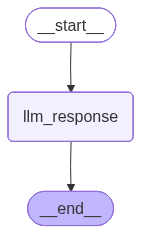

In [16]:
Image(workflow.get_graph().draw_mermaid_png())

In [17]:
initial_state = {"input": "Hello"}
final_state = workflow.invoke(initial_state)

print(f"Input: {final_state['input']}")
print(f"Output: {final_state['output']}")

Input: Hello
Output: Hello! How can I help you today?
